# Loading and vectorization

In [1]:
# Imports
import pandas as pd

from imblearn.under_sampling import RandomUnderSampler

## Data loading

In the descriptive analysis step we produced 3 datasets:

- Full, including all the extracted features
- Full text, which contains only one field (apart form the recid and the spam label). This field is a concatenation of the keywords, title and description, which were cleaned from HTML tags, punctuation marks and decoded using unicode.
- Text 4000, which is similar to the previous one but the amount of text of each field was limited, to sum up a maximum of 4000 words. Keywords was limited to 100, title to 400 and description to 3500. This numbers were taken from the descriptive analysis and it can be understoo that most of the records will either contain less words or will not have important information in the word that are removed.

Now we want to produce two additional balanced datasets:

- Full text
- Text 4000

In [2]:
base_path = "."

In [ ]:
full_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_processed_text.jsonl"
full_df = pd.read_json(full_filepath, lines=True)  # The file is JSONLines

In [ ]:
full_df.head()

In [ ]:
spam_ham = full_df.spam.value_counts()
print(spam_ham)

In [ ]:
text4k_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_processed_text_4000.jsonl"
text4k_df = pd.read_json(text4k_filepath, lines=True)  # The file is JSONLines

In [ ]:
text4k_df.head()

In [ ]:
spam_ham = text4k_df.spam.value_counts()
print(spam_ham)

## Balanced dataset: Undersampling

It has been seen on the next steps (Neural Networks) that the classfication accuracy is being tampered due to the imbalanced nature of the dataset. That is, the classfier ouputs the majority class in most of the cases, getting a high accuracy score. Therefore, a balanced version of the dataset is provided.

This dataset contains 90% of the minority class samples, and the same amount of majority class samples obtained by undersampling. This is done using the `imblearn` library.

To balance the data set we will use the RandomUnderSampler. There is enough data for a random sample to be uniformly distributed accross the different types of sub-classes on the majority class. However, if there were pointers to a loss of information we would use the Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.

The store (resulting set) is comprised of all examples in the minority set and only examples from the majority set that cannot be classified correctly are added incrementally to the store.

In [ ]:
# Default strategy is `not minority` therefore it will only resample the ham (False) class
def undersample(data, labels):
    random_undersampler = RandomUnderSampler(random_state=777) # For reproducibility
    data_random_balanced, labels_random_balanced = random_undersampler.fit_resample(data, labels)
    data_random_balanced['spam'] = labels_random_balanced
    
    return data_random_balanced

### Full text

In [ ]:
labels = full_df['spam']
data = full_df.drop('spam', axis=1)

full_text_undersample = undersample(data, labels)

In [ ]:
full_text_undersample.head()

In [ ]:
spam_ham = full_text_undersample.spam.value_counts()
print(spam_ham)

In [ ]:
output_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_balanced_full.jsonl"
full_text_undersample.to_json(output_filepath, orient='records', lines=True)

### Text 4000

In [ ]:
labels = text4k_df['spam']
data = text4k_df.drop('spam', axis=1)

text4k_undersample = undersample(data, labels)

In [ ]:
text4k_undersample.head()

In [ ]:
spam_ham = text4k_undersample.spam.value_counts()
print(spam_ham)

In [ ]:
output_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_balanced_text_4000.jsonl"
text4k_undersample.to_json(output_filepath, orient='records', lines=True)

## Language detection

Using `langdetect` as per: https://arxiv.org/pdf/1801.07779.pdf

CLD-2 is pretty good and extremely fast
lang-detect is a tiny bit better, but much slower
langid is good, but CLD-2 and lang-detect are much better
NLTK's Textcat is neither efficient nor effective.

In [4]:
text4k_undersample = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_balanced_text_4000.jsonl"
text4k_df = pd.read_json(text4k_undersample, lines=True)  # The file is JSONLines
text4k_df.head()

,recid,text_4000,spam
0,1835666,the etiology of acute pleurisy with effusion n/a,False
1,3044415,biodiversity taxonomy terrestrial herbarium so...,False
2,2071031,zur kenntniss des olivenls n/a,False
3,2825828,science school was burned: a case study of cri...,False
4,1683734,the heat of vaporization of air n/a,False


In [8]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def lang(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'
        

In [9]:
text4k_df['lang'] = text4k_df.apply(lambda x: lang(x['text_4000']), axis=1)

In [10]:
output_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-24_balanced_text_4000_lang.jsonl"
text4k_df.to_json(output_filepath, orient='records', lines=True)

en         56190
fr          3886
de          3479
id          3004
es          1396
tr          1320
pt          1272
it          1054
cs           597
nl           432
af           425
ca           330
ro           295
sw           256
tl           243
hu           189
cy           183
sl           160
sv           129
da           115
sk           114
so            83
vi            79
no            74
et            74
pl            57
fi            46
hr            44
lt            13
el            12
lv             8
sq             6
unknown        3
Name: lang, dtype: int64


<AxesSubplot:>

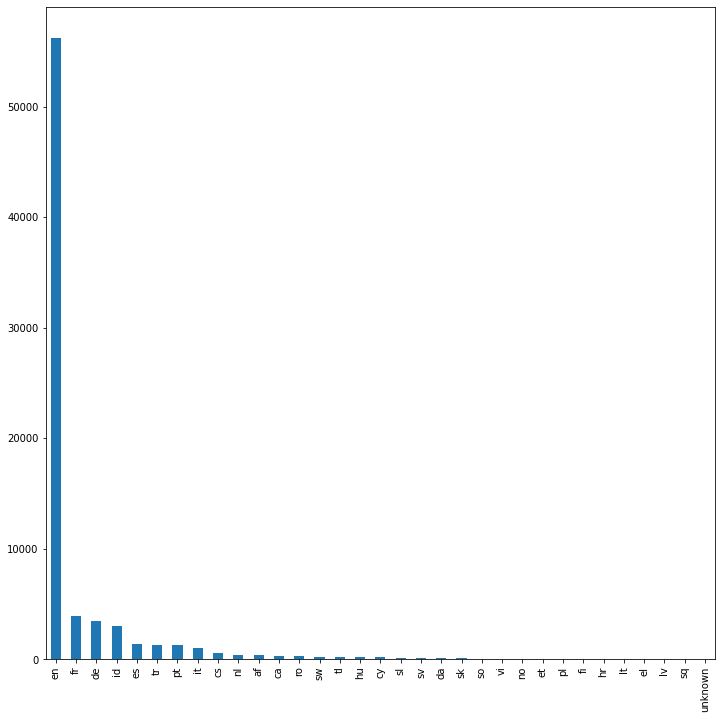

In [5]:
lang_count = text4k_df.lang.value_counts()
print(lang_count)
lang_count.plot(kind='bar', figsize=(12,12))

en         25172
fr          3435
id          2862
tr          1271
pt          1160
es           939
cs           587
it           544
de           288
sw           247
tl           194
nl           190
hu           183
vi            79
sv            77
sl            76
so            71
af            67
sk            57
ca            51
et            41
cy            37
pl            31
da            29
hr            29
ro            26
no            15
el             9
lt             8
fi             5
sq             2
unknown        1
lv             1
Name: lang, dtype: int64


<AxesSubplot:>

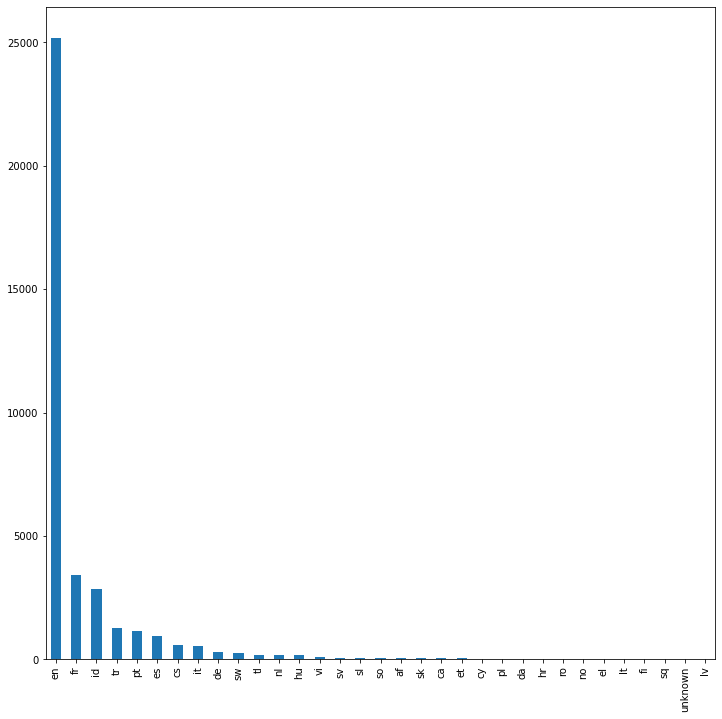

In [6]:
lang_count = text4k_df[text4k_df.spam == True].lang.value_counts()
print(lang_count)
lang_count.plot(kind='bar', figsize=(12,12))

en         31018
de          3191
it           510
es           457
fr           451
af           358
ca           279
ro           269
nl           242
cy           146
id           142
pt           112
da            86
sl            84
no            59
sk            57
sv            52
tr            49
tl            49
fi            41
et            33
pl            26
hr            15
so            12
cs            10
sw             9
lv             7
hu             6
lt             5
sq             4
el             3
unknown        2
Name: lang, dtype: int64


<AxesSubplot:>

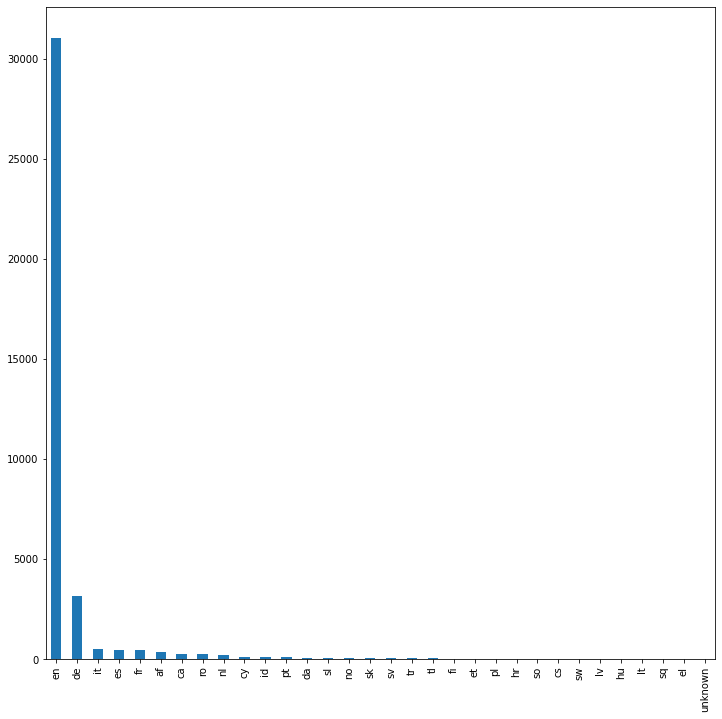

In [7]:
lang_count = text4k_df[text4k_df.spam == False].lang.value_counts()
print(lang_count)
lang_count.plot(kind='bar', figsize=(12,12))

In [16]:
text4k_df_en = text4k_df[text4k_df.lang == 'en']
text4k_df_en.head()

,recid,text_4000,spam,lang
0,1835666,the etiology of acute pleurisy with effusion n/a,False,en
1,3044415,biodiversity taxonomy terrestrial herbarium so...,False,en
3,2825828,science school was burned: a case study of cri...,False,en
4,1683734,the heat of vaporization of air n/a,False,en
6,3788697,biodiversity taxonomy animalia arthropoda inse...,False,en


In [19]:
text4k_df_en.spam.value_counts()

False    31018
True     25172
Name: spam, dtype: int64

In [20]:
output_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-26_balanced_text_4000_lang_en.jsonl"
text4k_df_en.to_json(output_filepath, orient='records', lines=True)